In [29]:
!pip install brian2

In [30]:
from brian2 import *
%matplotlib inline

In [31]:
# Config
start_scope()

E1 = 400
E2 = 400
IN = 200

tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G1 = NeuronGroup(E1, eqs, threshold='v>1', reset='v=0')
G2 = NeuronGroup(E2, eqs, threshold='v>1', reset='v=0')
G3 = NeuronGroup(IN, eqs, threshold='v>1', reset='v=0')

G1.v = 'rand()'
G2.v = 'rand()'
G3.v = 'rand()'

S1 = Synapses(G1, G3, on_pre='v_post += 0.01')
S2 = Synapses(G2, G3, on_pre='v_post += 0.01')

S3 = Synapses(G3, G1, on_pre='v_post -= 0.02')
S4 = Synapses(G3, G2, on_pre='v_post -= 0.02')

S5 = Synapses(G1, G2, on_pre='v_post -= 0.02')
S6 = Synapses(G2, G1, on_pre='v_post -= 0.02')

S1.connect(condition=True, p=0.1)
S2.connect(condition=True, p=0.1)

S3.connect(condition=True, p=0.1)
S4.connect(condition=True, p=0.1)

S5.connect(condition=True, p=0.1)
S6.connect(condition=True, p=0.1)


In [32]:
stimulus1 = TimedArray(np.tile([0., 50., 100., 50., 0.], 5)*Hz, dt=10.*ms)
stimulus2 = TimedArray(np.tile([0., 0., 0., 0., 0.], 5)*Hz, dt=10.*ms)

P1 = PoissonGroup(E1, rates='stimulus1(t)')
P2 = PoissonGroup(E2, rates='stimulus2(t)')

SP1 = Synapses(P1, G1, on_pre='v+=0.2')
SP2 = Synapses(P2, G2, on_pre='v+=0.2')

SP1.connect(j='i')
SP2.connect(j='i')

WARNING    "i" is an internal variable of group "synapses_8", but also exists in the run namespace with the value 3. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Text(0, 0.5, 'Neuron index')

<Figure size 648x288 with 0 Axes>

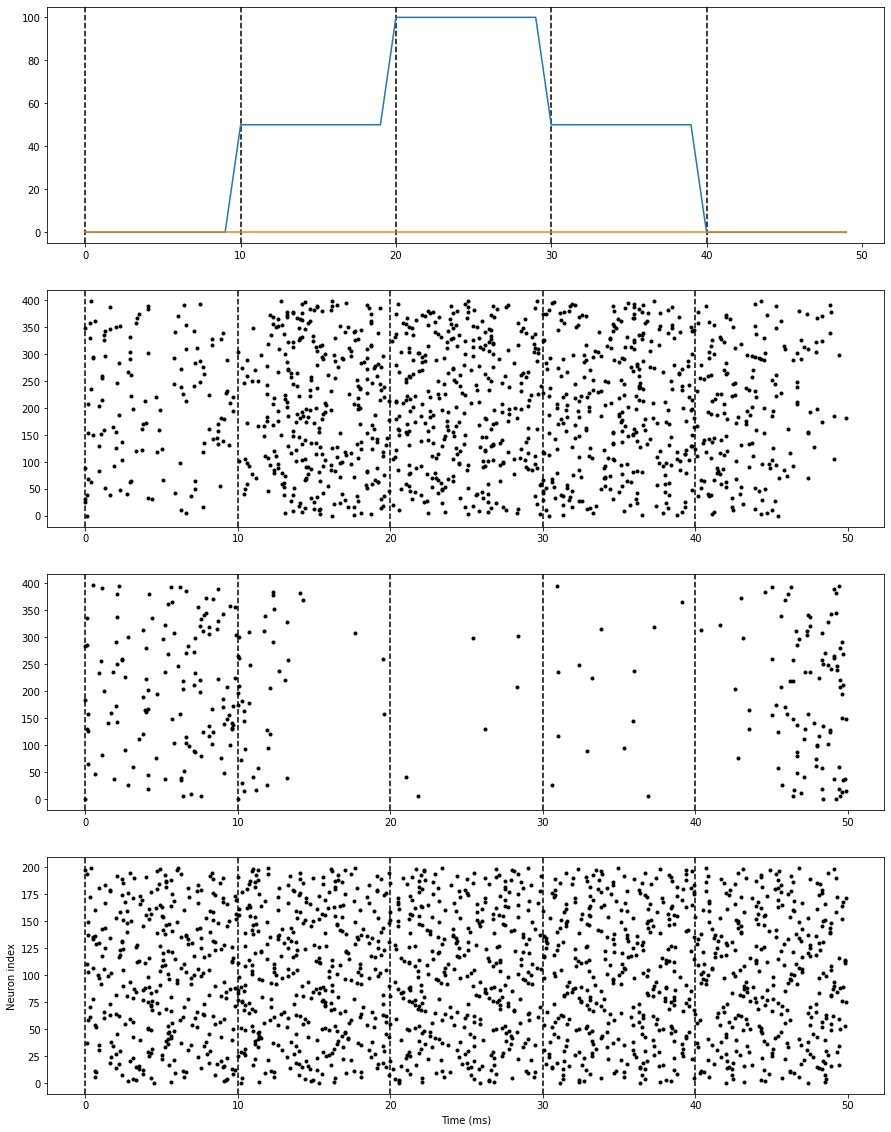

In [33]:
spikemon1 = SpikeMonitor(G1)
spikemon2 = SpikeMonitor(G2)
spikemon3 = SpikeMonitor(G3)

figure(figsize=(9, 4))
fig, axarr = plt.subplots(4, figsize = (15, 20)) 

for l in range(5):
    run(10*ms)
    for i in range(4):
      axarr[i].axvline(l*10, ls='--', c='k')

axarr[0].plot([stimulus1(t*ms) for t in range(50)])
axarr[0].plot([stimulus2(t*ms) for t in range(50)])
axarr[1].plot(spikemon1.t/ms, spikemon1.i, '.k')
axarr[2].plot(spikemon2.t/ms, spikemon2.i, '.k')
axarr[3].plot(spikemon3.t/ms, spikemon3.i, '.k')

xlabel('Time (ms)')
ylabel('Neuron index')